In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

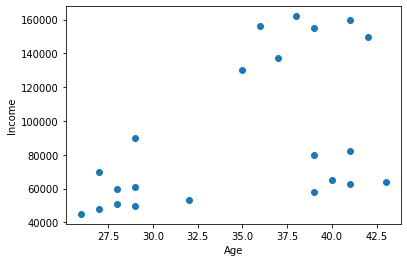

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [5]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [6]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

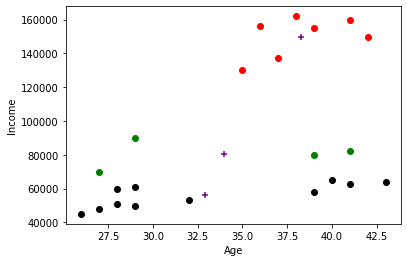

In [8]:
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',label='Centroid',marker='+')

plt.xlabel('Age')
plt.ylabel('Income')

plt.show()

In [9]:
%%markdown 
#### Elbow Plot

#### Elbow Plot


In [18]:
sse = []
k_range = range(1,10)

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df[['Age','Income($)']])
    sse.append(model.inertia_)


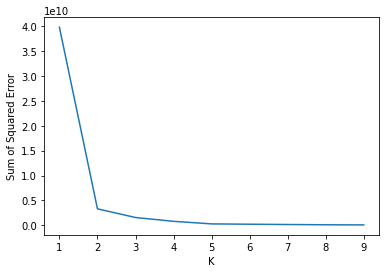

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range,sse)